In [ ]:
#a Tensor library with GPU support
import torch

#Datasets, Transforms and Models specific to Computer Vision
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

#differentiation library that supports all differentiable Tensor operations in torch
from torch.autograd import Variable

#a neural networks library integrated with autograd functionality
import torch.nn as nn
import torch.nn.functional as F

#an optimization package with standard optimization methods such as SGD, RMSProp, LBFGS, Adam etc.
import torch.optim as optim

#scientific computing library for Python
import numpy as np

#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.

from torch.utils.data import Dataset
from PIL import Image

In [ ]:
!gdown -O imageds.zip "https://drive.google.com/u/0/uc?id=1QodVZdxlap16ILMZWPnXC6jkdeyYCn8X&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=1QodVZdxlap16ILMZWPnXC6jkdeyYCn8X&export=download
To: /content/imageds.zip
100% 3.42M/3.42M [00:00<00:00, 217MB/s]


In [ ]:
!ls -lh

total 3.3M
-rw-r--r-- 1 root root 3.3M Aug 26 16:03 imageds.zip
drwxr-xr-x 1 root root 4.0K Aug 24 21:25 sample_data


In [ ]:
!unzip imageds.zip

Archive:  imageds.zip
   creating: imageds/
  inflating: imageds/mapping.csv     
   creating: imageds/train/
   creating: imageds/train/001.Black_footed_Albatross/
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0032_796115.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0041_796108.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0026_796095.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0045_796129.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0058_796074.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0036_796127.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatross_0077_796114.jpg  
  inflating: imageds/train/001.Black_footed_Albatross/Black_Footed_Albatros

In [ ]:
class CustomDataset(Dataset):


    def __init__(self, root, train=True, transform=None):
        self.root = root
        self.transform = transform
        self.train = train

        self.load_data()

    def load_data(self):

        mapping = open(self.root+'/mapping.csv','r')
        h= 0
        path = []
        lb = []
        for ln in mapping:
          if(h==0):
            h=1
            continue

          info = ln.split(',')
          if(info[1]=='Brewer_Blackbird_0028_2682.jpg'):
            continue
          path.append(info[0]+info[1])
          lb.append(info[2])

        mapping.close()
        self.image = path
        self.label = lb

    def __len__(self):
        return len(self.image)

    def __getitem__(self, idx):
        sample = self.image[idx]
        img=Image.open(self.root+'/'+sample)
        target = torch.tensor(float(self.label[idx]))


        if self.transform is not None:
            img = self.transform(img)

        return img, target

##Different transformations provided by PyTorch
[https://pytorch.org/vision/stable/transforms.html](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
ds = CustomDataset('imageds',transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) )

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
trainloader = torch.utils.data.DataLoader(ds, batch_size=5,
                                          shuffle=True, num_workers=2)

tensor([1., 3., 1., 3., 4.])


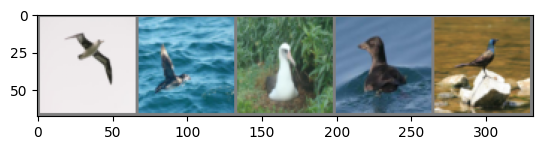

In [ ]:
import torchvision
dataiter = iter(trainloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

##### Exercise
- Change the code of the custom dataset to only load test images
- Write the training/test code, run it and also report the test accuracy.
- Also Get the time needed for training the model



In [ ]:
class CustomData(Dataset):


    def __init__(self, root, train=True, transform=None):
        self.root = root
        self.transform = transform
        self.train = train

        self.load_data()

    def load_data(self):

        mapping = open(self.root+'/mapping.csv','r')
        h= 0
        path = []
        lb = []
        for ln in mapping:
          if(h==0):
            h=1
            continue

          info = ln.split(',')

          if(info[1]=='Brewer_Blackbird_0028_2682.jpg'):
            continue

          if(info[0][0:4]=='test'):
            path.append(info[0]+info[1])
            lb.append(info[2])

        mapping.close()
        self.image = path
        self.label = lb

    def __len__(self):
        return len(self.image)

    def __getitem__(self, idx):
        sample = self.image[idx]
        img=Image.open(self.root+'/'+sample)
        target = torch.tensor(float(self.label[idx]))


        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [ ]:
dst = CustomData('imageds',transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) )

In [ ]:
testloader = torch.utils.data.DataLoader(dst, batch_size=5,
                                          shuffle=True, num_workers=2)

tensor([3., 4., 4., 0., 0.])


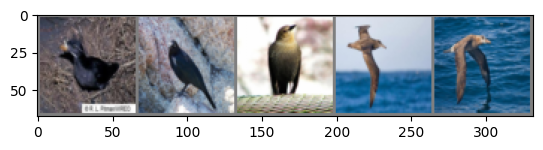

In [ ]:
import torchvision
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

Checked if the folder of the imageds is test and only append in the list if that is true

In [ ]:
device = "cuda:0"

In [ ]:
class Net(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1,padding=0,bias=True)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        #fully connected layers
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    #defining the structure of the network
    def forward(self, x):

        #Applying relu activation after each conv layer
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)

        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)

        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 16 * 13* 13)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

#Printing the network architecture
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2704, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import time
plotIter = 20
plotIterCntr = 0
numEpochs = 10
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net.cuda()
starttime=time.time()


for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        labels = labels.type(torch.LongTensor)

        # inputs, labels = inputs.to(device),labels.to(device)

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0
endtime=time.time()
print('Finished Training')
print('Time taken:', endtime-starttime)

[1,    20] loss: 2.272
[2,    20] loss: 2.234
[3,    20] loss: 2.189
[4,    20] loss: 2.119
[5,    20] loss: 1.949
[6,    20] loss: 1.712
[7,    20] loss: 1.645
[8,    20] loss: 1.647
[9,    20] loss: 1.629
[10,    20] loss: 1.631
Finished Training
Time taken: 6.0303871631622314


Trained on the dataset and kept track of the time of start and the time of ending using the time library to get the time of training

In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 26 %


# PyTorch ImageFolder
- A generic dataloader for directly loading images from folders into a dataset.
- Requires the images to be in the following format:


```
root/dog/xxx.png
root/dog/xxy.png

root/cat/123.png
root/cat/nsdf3.png
```




In [ ]:
dsimgfolder = torchvision.datasets.ImageFolder(root='imageds',transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

In [ ]:
trainloader_imgfolder = torch.utils.data.DataLoader(dsimgfolder, batch_size=5,
                                          shuffle=True, num_workers=2)

In [ ]:
dsimgfolder_t = torchvision.datasets.ImageFolder(root='imageds/test',transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

In [ ]:
testloader_imgfolder = torch.utils.data.DataLoader(dsimgfolder_t, batch_size=5,
                                          shuffle=False, num_workers=2)


tensor([1, 1, 1, 1, 1])


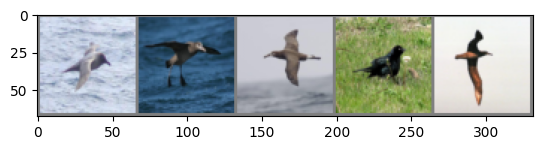

In [ ]:
import torchvision
dataiter = iter(trainloader_imgfolder)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

##### Exercise
- Write the training/test code, run it and also report the test accuracy.
- Also Get the time needed for training the model for the same number of epochs as the previous exercise and compare the time required



In [ ]:
class Net2(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net2, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1,padding=0,bias=True)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        #fully connected layers
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    #defining the structure of the network
    def forward(self, x):

        #Applying relu activation after each conv layer
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)

        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)

        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 16 * 13* 13)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net2 = Net2()

#Printing the network architecture
print(net2)

Net2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2704, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import time
plotIter = 20
plotIterCntr = 0
numEpochs = 10
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net2.cuda()
starttime=time.time()


for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_imgfolder, 0):
        # get the inputs
        inputs, labels = data
        labels = labels.type(torch.LongTensor)

        # inputs, labels = inputs.to(device),labels.to(device)

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0
endtime=time.time()
print('Finished Training')
print('Time taken:', endtime-starttime)

[1,    20] loss: 0.379
[2,    20] loss: 0.388
[3,    20] loss: 0.355
[4,    20] loss: 0.365
[5,    20] loss: 0.425
[6,    20] loss: 0.399
[7,    20] loss: 0.293
[8,    20] loss: 0.451
[9,    20] loss: 0.451
[10,    20] loss: 0.430
Finished Training
Time taken: 3.642458915710449


In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader_imgfolder:
    images, labels = data
    outputs = net2(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 22 %


# Custom Dataset vs ImageFolder

Custom Dataset allows
- for much more customization
- can also be used when the images are not in any folders
- can also be used when the images are in different folders and not following any standard storage policy

# Custom changes to a standard dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/content/data/lab', train=True, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 92584393.09it/s] 


Extracting /content/data/lab/cifar-10-python.tar.gz to /content/data/lab


In [ ]:
set(trainset.targets)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
tgts = torch.Tensor(trainset.targets)

## Indices of label 2

In [ ]:
pos2 = tgts==2
pos2

tensor([False, False, False,  ..., False, False, False])

In [ ]:
tgts[pos2]

tensor([2., 2., 2.,  ..., 2., 2., 2.])

## What if we only want to train on the classes 2 and 4

In [ ]:
class CustomDataset(Dataset):


    def __init__(self, dataset):
        targets = torch.Tensor(dataset.targets)
        pos2 = targets==2
        pos4 = targets==4

        index2 = torch.nonzero(pos2)
        index4 = torch.nonzero(pos4)

        self.index = torch.cat((index2,index4),dim=0)
        self.data = dataset

        tgt = []
        for ind in self.index:
          _,label = self.data[ind]
          tgt.append(label)
        self.targets = tgt


        # self.data = dataset

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        realindex = self.index[idx]
        img, target = self.data[realindex]

        return img, target




In [ ]:
ds = CustomDataset(trainset)

In [ ]:
set(ds.targets)

{2, 4}

##### Exercise
- Modify the above custom dataset such that it contains images for all CIFAR-10 classes except classes 8 and 9



In [ ]:
class CustomData89(Dataset):


    def __init__(self, dataset):
        targets = torch.Tensor(dataset.targets)
        pos0 = targets==0
        pos1 = targets==1
        pos2 = targets==2
        pos3 = targets==3
        pos4 = targets==4
        pos5 = targets==5
        pos6 = targets==6
        pos7 = targets==7

        index0 = torch.nonzero(pos0)
        index1 = torch.nonzero(pos1)
        index2 = torch.nonzero(pos2)
        index3 = torch.nonzero(pos3)
        index4 = torch.nonzero(pos4)
        index5 = torch.nonzero(pos5)
        index6 = torch.nonzero(pos6)
        index7 = torch.nonzero(pos7)

        self.index = torch.cat((index0,index1,index2,index3,index4,index5,index6,index7),dim=0)
        self.data = dataset

        tgt = []
        for ind in self.index:
          _,label = self.data[ind]
          tgt.append(label)
        self.targets = tgt


        # self.data = dataset

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        realindex = self.index[idx]
        img, target = self.data[realindex]

        return img, target

In [ ]:
ds = CustomData89(trainset)

In [ ]:
set(ds.targets)

{0, 1, 2, 3, 4, 5, 6, 7}

Removed 8,9 from the dataset by only concatenating the previous data labels in the list